In [1]:
#Importing Needed Packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import pandas as pd
import cufflinks as cf
import yfinance as yf
cf.set_config_file(theme='pearl', world_readable=False)
cf.go_offline()
%matplotlib inline

In [57]:
#Reading database file as weather_df and making date_time column as index of dataframe
weather_df = pd.read_excel('TataData.xlsx', parse_dates=['Datetime'], index_col='Datetime')
weather_df.head(3589)

,Batterie (V),Rayonnement global (j/cm²),Température (°C),ETo (mm),Humidité relative (%),Précipitation (mm),Vitesse du vent (km/h),Direction du vent (°),tempmax,tempmin,...,precip,precipprob,precipcover,windspeed,winddir,cloudcover,solarradiation,solarenergy,uvindex,conditions
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-06-22,6.76,2728.52,35.10,7.43,13.16,0.0,12.88,166.57,41.8,23.7,...,0.0,0,0.0,30.6,253.5,0.0,360.4,31.1,10,Clear
2012-06-23,6.76,1778.98,35.54,6.64,12.12,0.0,24.33,125.53,43.9,26.7,...,0.0,0,0.0,25.6,128.5,4.8,321.3,27.7,10,Clear
2012-06-24,6.73,1402.39,34.72,6.21,16.95,0.0,18.74,153.65,40.0,25.8,...,0.0,0,0.0,19.8,122.7,46.6,234.4,20.2,8,Partially cloudy
2012-06-25,6.76,1907.94,36.30,6.36,13.10,0.0,18.84,154.63,43.4,29.1,...,0.0,0,0.0,24.1,136.4,60.8,290.6,25.2,10,Partially cloudy
2012-06-26,6.76,2204.78,37.07,7.34,13.08,0.2,18.36,181.03,42.3,28.2,...,0.0,0,0.0,24.5,118.8,68.9,229.4,19.9,7,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.4,18.2,...,0.0,0,0.0,19.1,159.9,0.0,333.6,28.7,10,Clear
2022-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.2,18.2,...,0.0,0,0.0,16.2,175.2,0.1,330.3,28.6,10,Clear
2022-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.6,19.3,...,0.0,0,0.0,19.4,267.5,56.7,306.6,26.6,10,Partially cloudy


In [6]:
MissingValues = weather_df.isnull()
Sum=MissingValues.sum()
Sum

Batterie (V)                    8
Rayonnement global (j/cm²)    763
Température (°C)                8
ETo (mm)                        8
Humidité relative (%)           8
Précipitation (mm)              8
Vitesse du vent (km/h)          8
Direction du vent (°)         763
tempmax                         0
tempmin                         0
temp                            0
feelslikemax                    0
feelslikemin                    0
feelslike                       0
dew                             0
humidity                        0
precip                          0
precipprob                      0
precipcover                     0
windspeed                       0
winddir                         0
cloudcover                      0
solarradiation                  0
solarenergy                     0
uvindex                         0
conditions                      0
dtype: int64

In [7]:
#weather_df['sealevelpressure']

In [8]:
weather_df.describe()


,Batterie (V),Rayonnement global (j/cm²),Température (°C),ETo (mm),Humidité relative (%),Précipitation (mm),Vitesse du vent (km/h),Direction du vent (°),tempmax,tempmin,...,humidity,precip,precipprob,precipcover,windspeed,winddir,cloudcover,solarradiation,solarenergy,uvindex
count,3645.000000,2890.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,2890.000000,3653.000000,3653.000000,...,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000
mean,6.872137,2012.106471,24.747292,4.700938,12.504310,0.221838,14.061619,175.754765,31.285847,16.291185,...,31.356118,0.325185,9.690665,3.036340,25.859923,200.833014,23.397126,260.107446,22.458719,8.554065
std,0.125527,634.179410,8.347116,2.451765,8.537735,2.374180,5.575256,44.996052,8.699604,7.715334,...,14.532989,2.474187,29.587111,12.445926,8.294462,87.130450,26.764574,73.651711,6.346451,1.566924
min,6.440000,0.000000,7.300000,0.000000,1.840000,0.000000,3.670000,59.990000,6.900000,-1.500000,...,7.100000,0.000000,0.000000,0.000000,7.200000,27.100000,0.000000,51.200000,4.400000,2.000000
25%,6.790000,1482.915000,17.310000,2.700000,6.630000,0.000000,9.710000,141.210000,23.800000,9.500000,...,19.800000,0.000000,0.000000,0.000000,19.400000,124.100000,0.800000,193.600000,16.700000,7.000000
50%,6.860000,2017.585000,24.460000,4.390000,10.230000,0.000000,13.390000,172.345000,31.100000,15.800000,...,29.100000,0.000000,0.000000,0.000000,25.900000,198.400000,12.300000,265.200000,22.900000,9.000000
75%,6.960000,2564.585000,32.250000,6.570000,15.820000,0.000000,17.780000,211.145000,39.200000,22.700000,...,40.100000,0.000000,0.000000,0.000000,31.700000,286.400000,39.600000,325.900000,28.200000,10.000000
max,7.160000,3162.170000,41.900000,12.140000,82.780000,84.800000,39.080000,274.150000,46.900000,33.400000,...,87.700000,55.400000,100.000000,100.000000,58.700000,343.500000,97.700000,392.700000,32.900000,10.000000


In [9]:
weather_df['Batterie (V)'].fillna(value=6.872137, inplace=True)
weather_df['Rayonnement global (j/cm²)'].fillna(value=2012.106471, inplace=True)
weather_df['Température (°C)'].fillna(value=24.747292, inplace=True)
weather_df['ETo (mm)'].fillna(value=4.700938, inplace=True)
weather_df['Humidité relative (%)'].fillna(value=12.504310, inplace=True)
weather_df['Précipitation (mm)'].fillna(value=0.221838, inplace=True)
weather_df['Vitesse du vent (km/h)'].fillna(value=14.061619, inplace=True)
weather_df['Direction du vent (°)'].fillna(value=175.754765, inplace=True)

In [10]:
MissingValues = weather_df.isnull()
Sum=MissingValues.sum()
Sum

Batterie (V)                  0
Rayonnement global (j/cm²)    0
Température (°C)              0
ETo (mm)                      0
Humidité relative (%)         0
Précipitation (mm)            0
Vitesse du vent (km/h)        0
Direction du vent (°)         0
tempmax                       0
tempmin                       0
temp                          0
feelslikemax                  0
feelslikemin                  0
feelslike                     0
dew                           0
humidity                      0
precip                        0
precipprob                    0
precipcover                   0
windspeed                     0
winddir                       0
cloudcover                    0
solarradiation                0
solarenergy                   0
uvindex                       0
conditions                    0
dtype: int64

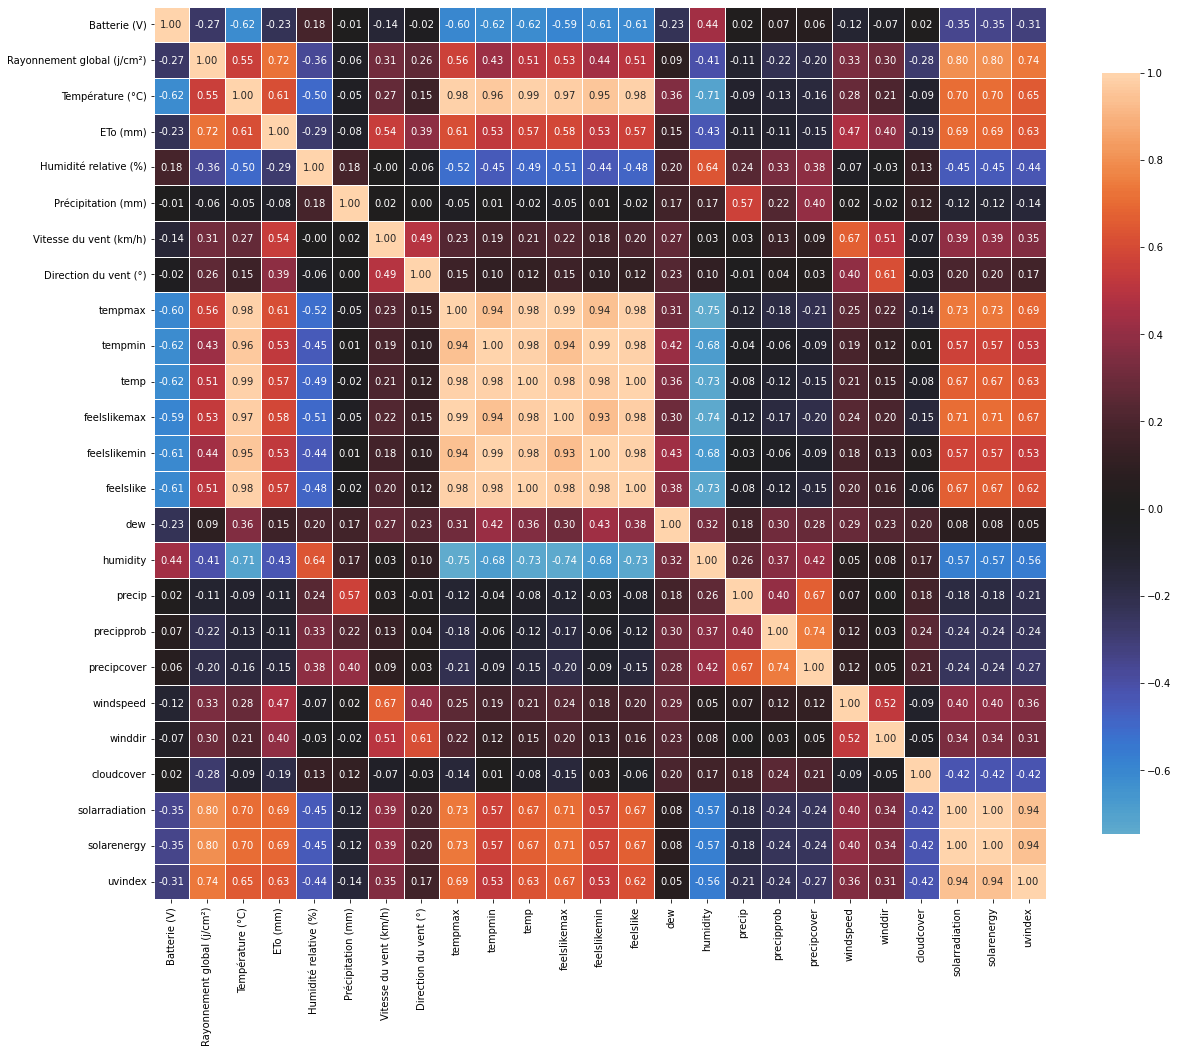

In [11]:
def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(weather_df)

<AxesSubplot:>

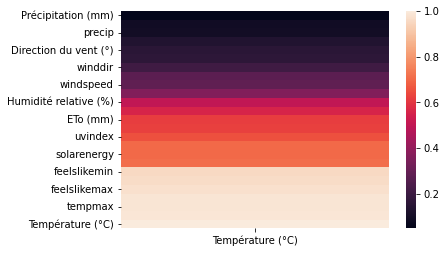

In [12]:
sns.heatmap(weather_df.corr().abs()[['Température (°C)']].sort_values('Température (°C)'))

array([<AxesSubplot:xlabel='Datetime'>], dtype=object)

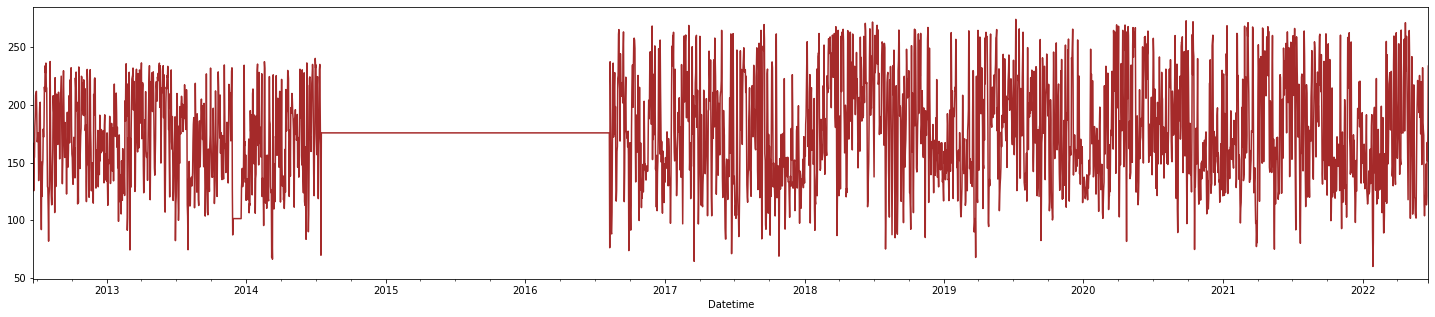

In [13]:
#Ploting all the column values for 1 year
weather_df['2012':'2022']['Direction du vent (°)'].resample('D').fillna(method='pad').plot(color='brown',subplots=True, figsize=(25,5))

In [14]:
weather_df_num=weather_df.loc[:,['Température (°C)','tempmax','tempmin','temp','humidity','solarradiation','solarenergy','uvindex']]


In [15]:
weather_df_num.head()

,Température (°C),tempmax,tempmin,temp,humidity,solarradiation,solarenergy,uvindex
Datetime,,,,,,,,
2012-06-22,35.10,41.8,23.7,33.3,15.1,360.4,31.1,10
2012-06-23,35.54,43.9,26.7,35.2,11.2,321.3,27.7,10
2012-06-24,34.72,40.0,25.8,33.7,14.6,234.4,20.2,8
2012-06-25,36.30,43.4,29.1,36.3,14.6,290.6,25.2,10
2012-06-26,37.07,42.3,28.2,35.8,15.5,229.4,19.9,7


In [16]:
#on va tester les 3 modules
#1- Multiple Linear Regression
#2- Decision Tree Regression
#3-  Random Forest Regression
#4-polynomial regression

In [17]:
weather_y=weather_df_num.pop("Température (°C)")
weather_x=weather_df_num
weather_x

,tempmax,tempmin,temp,humidity,solarradiation,solarenergy,uvindex
Datetime,,,,,,,
2012-06-22,41.8,23.7,33.3,15.1,360.4,31.1,10
2012-06-23,43.9,26.7,35.2,11.2,321.3,27.7,10
2012-06-24,40.0,25.8,33.7,14.6,234.4,20.2,8
2012-06-25,43.4,29.1,36.3,14.6,290.6,25.2,10
2012-06-26,42.3,28.2,35.8,15.5,229.4,19.9,7
...,...,...,...,...,...,...,...
2022-06-18,41.2,30.0,36.2,11.7,364.8,31.5,10
2022-06-19,41.0,30.0,35.9,12.3,371.3,32.0,10
2022-06-20,37.5,30.1,33.8,19.8,300.7,25.7,10


In [18]:
#Now our dataset is prepared and it is ready to be fed to the model for training.it’s time to split the dataset into training and testing
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [20]:
prediction = model.predict(test_X)

In [21]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 0.92
R2-score: 0.98


In [22]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
Datetime,,,
2020-02-22,16.87,17.79,-0.92
2021-06-02,31.26,30.66,0.60
2013-05-19,25.55,26.08,-0.53
2015-11-23,17.20,15.34,1.86
2013-08-05,35.14,35.16,-0.02
...,...,...,...
2019-11-27,19.47,20.85,-1.38
2021-04-02,26.47,26.02,0.45
2015-08-02,34.49,35.30,-0.81


<AxesSubplot:xlabel='Datetime'>

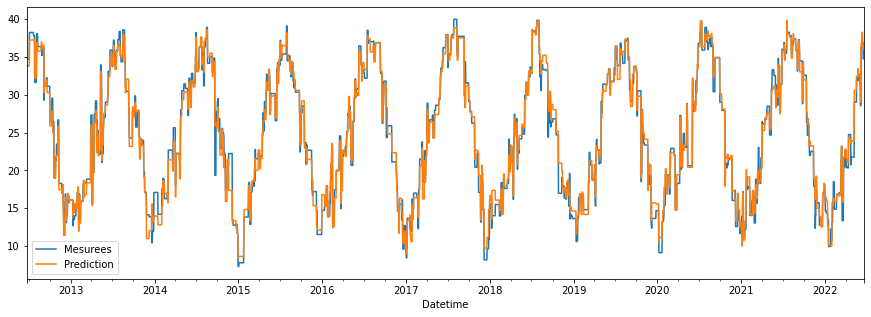

In [23]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction})['2012':'2022'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [25]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Multiple Linear Regression ',subplots=False)

In [26]:
#Decision Tree Regression

In [27]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [28]:
prediction2=regressor.predict(test_X)

In [29]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,Prediction,diff
Datetime,,,
2020-02-22,16.87,19.85,-2.98
2021-06-02,31.26,30.30,0.96
2013-05-19,25.55,27.17,-1.62
2015-11-23,17.20,13.84,3.36
2013-08-05,35.14,34.57,0.57
...,...,...,...
2019-11-27,19.47,22.14,-2.67
2021-04-02,26.47,26.97,-0.50
2015-08-02,34.49,34.85,-0.36


In [30]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 1.20
R2-score: 0.96


<AxesSubplot:xlabel='Datetime'>

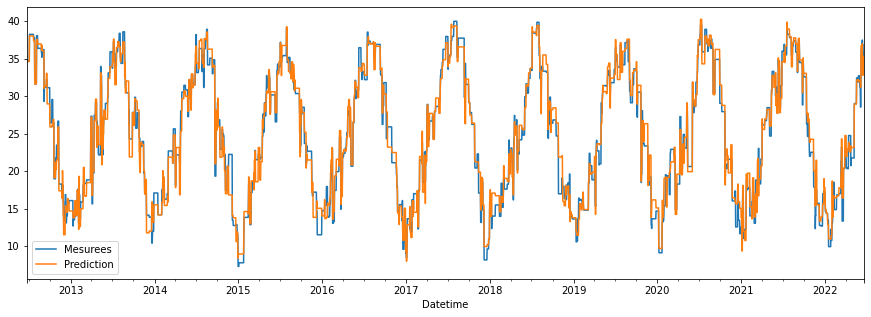

In [31]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction2})['2012':'2022'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [32]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction2})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Decision Tree Regression',subplots=False)

In [33]:
#Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [35]:
prediction3=regr.predict(test_X)

In [36]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 0.89
R2-score: 0.98


In [37]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
Datetime,,,
2020-02-22,16.87,17.16,-0.29
2021-06-02,31.26,30.60,0.66
2013-05-19,25.55,26.88,-1.33
2015-11-23,17.20,14.25,2.95
2013-08-05,35.14,34.42,0.72
...,...,...,...
2019-11-27,19.47,21.47,-2.00
2021-04-02,26.47,27.06,-0.59
2015-08-02,34.49,35.22,-0.73


<AxesSubplot:xlabel='Datetime'>

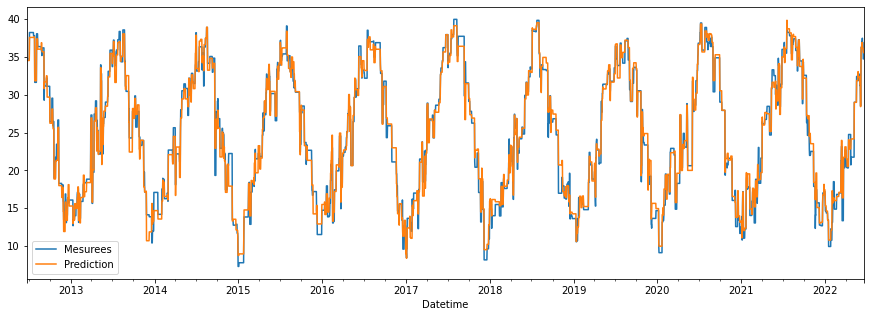

In [38]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction3})['2012':'2022'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [39]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction3})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Random Forest Regression',subplots=False)

In [40]:
#Polynomial Regression

In [41]:
from sklearn.preprocessing import PolynomialFeatures # importing a class for Polynomial Regression
poly_regr = PolynomialFeatures(degree = 3) # our polynomial model is of order
X_poly = poly_regr.fit_transform(train_X) # transforms the features to the polynomial form
polyReg = LinearRegression() # creates a linear regression object
polyReg.fit(X_poly, train_y) # fits the linear regression object to the polynomial features



LinearRegression()

In [42]:
prediction4=polyReg.predict(poly_regr.fit_transform(test_X))

In [43]:
for i in range(len(prediction4)):
  prediction4[i]=round(prediction4[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction4,'diff':(test_y-prediction4)})

,Actual,Prediction,diff
Datetime,,,
2020-02-22,16.87,17.82,-0.95
2021-06-02,31.26,30.73,0.53
2013-05-19,25.55,26.68,-1.13
2015-11-23,17.20,15.00,2.20
2013-08-05,35.14,35.21,-0.07
...,...,...,...
2019-11-27,19.47,20.66,-1.19
2021-04-02,26.47,26.61,-0.14
2015-08-02,34.49,34.83,-0.34


<AxesSubplot:xlabel='Datetime'>

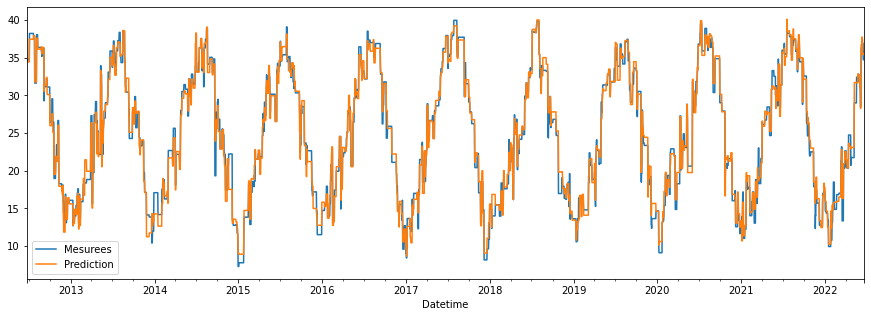

In [44]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction4})['2012':'2022'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [45]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction4})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Polynomial Regression',subplots=False)

In [48]:
#print('Variance score: %.2f' % polyReg.score(poly_regr.fit_transform(test_X),test_y))
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction4 - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction4 ) )

Mean absolute error: 0.87
R2-score: 0.98


In [62]:
#Comparaison des modeles

In [63]:
pd.DataFrame({'Valeur réelle':test_y,'MLR Model':prediction,'DTR Model':prediction2,'RFR Model':prediction3,'PR Model':prediction4})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Comparaison des predictions des modeles avec la valeur reelle mesuree',subplots=False)

In [46]:
import requests
import json
response_API = requests.get('https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/tata%20maroc?unitGroup=metric&include=days&key=VSJTPURWV477GP6K5L8ZX8UWN&contentType=json')
df=response_API.json()
data=df['days']
data


[{'datetime': '2022-06-25',
  'datetimeEpoch': 1656111600,
  'tempmax': 37.2,
  'tempmin': 25.5,
  'temp': 31.2,
  'feelslikemax': 34.3,
  'feelslikemin': 25.5,
  'feelslike': 29.7,
  'dew': 5.4,
  'humidity': 21.2,
  'precip': 0.0,
  'precipprob': 0.0,
  'precipcover': 0.0,
  'preciptype': None,
  'snow': 0.0,
  'snowdepth': 0.0,
  'windgust': 29.9,
  'windspeed': 18.0,
  'winddir': 261.7,
  'pressure': 1006.8,
  'cloudcover': 0.0,
  'visibility': 24.1,
  'solarradiation': 371.3,
  'solarenergy': 32.1,
  'uvindex': 10.0,
  'severerisk': 10.0,
  'sunrise': '06:33:02',
  'sunriseEpoch': 1656135182,
  'sunset': '20:36:06',
  'sunsetEpoch': 1656185766,
  'moonphase': 0.95,
  'conditions': 'Clear',
  'description': 'Clear conditions throughout the day.',
  'icon': 'clear-day',
  'stations': ['remote'],
  'source': 'comb'},
 {'datetime': '2022-06-26',
  'datetimeEpoch': 1656198000,
  'tempmax': 37.2,
  'tempmin': 25.6,
  'temp': 31.4,
  'feelslikemax': 34.7,
  'feelslikemin': 25.6,
  'feels

In [47]:
datetime=np.array([])
tempmax=np.array([])
tempmin=np.array([])
temp=np.array([])
humidity=np.array([])
solarradiation=np.array([])
solarenergy=np.array([])
uvindex=np.array([])
#'Température (°C)','tempmax','tempmin','temp','humidity','solarradiation','solarenergy','uvindex'
for i in range(len(data)):
    datetime=np.append(datetime, data[i]['datetime'])
    tempmax=np.append(tempmax, data[i]['tempmax'])
    tempmin=np.append(tempmin, data[i]['tempmin'])
    temp=np.append(temp, data[i]['temp'])
    humidity=np.append(humidity, data[i]['humidity'])
    solarradiation=np.append(solarradiation, data[i]['solarradiation'])
    solarenergy=np.append(solarenergy, data[i]['solarenergy'])
    uvindex=np.append(uvindex, data[i]['uvindex'])

In [48]:
xc=pd.DataFrame({'datetime':datetime,'tempmax':tempmax,'tempmin':tempmin,'temp':temp,'humidity':humidity,'solarradiation':solarradiation,'solarenergy':solarenergy,'uvindex':uvindex})

In [49]:
xc.set_index(['datetime'],inplace = True)
xc

,tempmax,tempmin,temp,humidity,solarradiation,solarenergy,uvindex
datetime,,,,,,,
2022-06-25,37.2,25.5,31.2,21.2,371.3,32.1,10.0
2022-06-26,37.2,25.6,31.4,26.9,367.8,31.8,10.0
2022-06-27,38.4,24.0,31.5,27.5,365.5,31.8,10.0
2022-06-28,38.0,24.0,31.5,26.7,366.5,31.8,10.0
2022-06-29,38.0,25.0,31.6,31.4,366.2,31.8,10.0
2022-06-30,36.6,24.3,31.1,26.7,353.9,30.5,10.0
2022-07-01,35.8,24.8,30.0,26.9,365.2,31.4,10.0
2022-07-02,35.5,20.8,28.7,24.2,367.2,31.8,10.0
2022-07-03,38.5,25.7,31.6,13.2,354.0,30.3,10.0


In [52]:
prediction11 = model.predict(xc)
prediction22=regressor.predict(xc)
prediction33=regr.predict(xc)
prediction44=polyReg.predict(poly_regr.fit_transform(xc))

In [53]:
for i in range(len(prediction11)):
  prediction11[i]=round(prediction11[i],2)

for i in range(len(prediction22)):
  prediction22[i]=round(prediction22[i],2)

for i in range(len(prediction33)):
  prediction33[i]=round(prediction33[i],2)

for i in range(len(prediction44)):
  prediction44[i]=round(prediction44[i],2)

Predictions=pd.DataFrame({'datetime':datetime,'API VisualCrossing':temp,'MLR Model':prediction11,'DTR Model':prediction22,'RFR Model':prediction33,'PR Model':prediction44})
Predictions.set_index(['datetime'],inplace = True)
Predictions

,API VisualCrossing,MLR Model,DTR Model,RFR Model,PR Model
datetime,,,,,
2022-06-25,31.2,32.26,32.04,30.70,31.01
2022-06-26,31.4,32.52,32.04,30.84,31.19
2022-06-27,31.5,32.91,32.73,31.93,31.84
2022-06-28,31.5,32.74,32.73,31.55,31.78
2022-06-29,31.6,33.01,28.59,30.35,31.48
2022-06-30,31.1,31.93,32.09,31.22,31.43
2022-07-01,30.0,31.16,29.86,30.07,30.15
2022-07-02,28.7,29.97,28.81,29.16,29.48
2022-07-03,31.6,32.64,31.97,32.13,32.63


In [54]:
Predictions.fillna(method='pad').iplot(title='Comparaison des predictions ',subplots=False)